In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
!pip install pymupdf
import fitz  # PyMuPDF for PDF extraction
import spacy
!pip install python-docx
from docx import Document

# Load spaCy's English model for NLP
nlp = spacy.load("en_core_web_sm")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 55.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.3/244.3 kB 3.7 MB/s eta 0:00:00


In [ ]:
# Example paths
resume_pdf_path = '/content/drive/MyDrive/Sandhya Resume.pdf'  # Path to the PDF resume
docx_path = '/content/drive/MyDrive/Skill dataset.docx'  # Path to the uploaded DOCX file
# Load the dataset from an Excel file
job_role_df = pd.read_excel('/content/drive/MyDrive/job role and skills.xlsx')  # Path to Excel file

In [ ]:
# Function to extract text from a PDF resume
def extract_text_from_pdf(pdf_path):
    doc = fitz.open(pdf_path)
    text = ""
    for page_num in range(doc.page_count):
        page = doc.load_page(page_num)
        text += page.get_text()
    return text
# Step 1: Extract text from the PDF resume
resume_text = extract_text_from_pdf(resume_pdf_path)
print("Extracted Resume Text:", resume_text)

Extracted Resume Text:  
SANDHYA J 
 
3rd Year B.Tech Artificial Intelligence and Data Science 
Rajalakshmi Engineering College 
 
 
  
Contact Information 
 Phone No: 6382910028 
 E-mail: sandhya26102004@gmail.com 
 GitHub link: https://github.com/SandhyaJayaraj  
 
 
Education 
Rajalakshmi Engineering College 
2022 - Present 
CGPA: 8.40 
Government Girls Higher Secondary School, Porur 
12th Computer Science with Mathematics, 2021 - 2022 
Grade: 91.17% 
Government Girls Higher Secondary School, Porur 
10th, 2019 - 2020 
Grade: 85.2% 
 
Skills 
 
Programming Languages : 
 C programming language including data structures (Intermediate). 
 Python Programming Language (Intermediate). 
 Java Programming Language (Basic). 
 
Frontend Web Development: 
 Experience in HTML, with the ability to create and structure web pages. 
 Basic understanding of CSS for styling web pages. 
 Basic understanding of JavaScript. 
 
Databases: 
 Basic knowledge of MySQL. 
 Basic knowledge of Oracle.

In [ ]:
# Function to extract skill keywords from a DOCX file
def extract_skills_from_docx(docx_path):
    doc = Document(docx_path)
    skills = []
    for paragraph in doc.paragraphs:
        skills.extend(paragraph.text.split())  # Split by spaces
    skills = [skill.strip().lower() for skill in skills if skill.strip()]  # Clean up whitespace and convert to lower case
    return skills
# Step 2: Extract skills from the DOCX file
skill_keywords = extract_skills_from_docx(docx_path)
print("Extracted Skill Keywords:", skill_keywords)

Extracted Skill Keywords: ['python', 'javascript', 'java', 'c', 'c++', 'sql', 'r', 'ruby', 'swift', 'html', 'css', 'react', 'node.js', 'angular', 'django', 'flask', 'spring', 'kotlin', 'typescript', 'php', 'c#', 'go', 'matlab', 'perl', 'rust', 'scala', 'bash', 'powershell', 'docker', 'kubernetes', 'jenkins', 'git', 'linux', 'aws', 'azure', 'gcp', 'hadoop', 'spark', 'terraform', 'ansible', 'tensorflow', 'pytorch', 'pandas', 'numpy', 'scikit-learn', 'tableau', 'power', 'bi', 'excel', 'salesforce', 'sap', 'oracle', 'mysql', 'postgresql', 'mongodb', 'redis', 'elasticsearch', 'clojure', 'elixir', 'f#', 'dlang', 'objective-c', 'swiftui', 'react', 'native', 'xamarin', 'cordova', 'phonegap', 'vue.js', 'backbone.js', 'ember.js', 'svelte', 'bootstrap', 'tailwind', 'css', 'grid', 'flexbox', 'material-ui', 'ant', 'design', 'bulma', 'foundation', 'electron', 'typeorm', 'sequelize', 'mongoose', 'sqlalchemy', 'doctrine', 'hibernate', 'jpa', 'apache', 'drill', 'presto', 'clickhouse', 'druid', 'airflow

In [ ]:
# Function to extract relevant skills from resume text based on the skill keywords
def extract_skills_from_resume(text, skill_keywords):
    doc = nlp(text)
    resume_skills = set()
    for token in doc:
        if token.lemma_.lower() in skill_keywords:  # Compare lowercased lemmatized tokens
            resume_skills.add(token.lemma_.lower())
    return list(resume_skills)
# Step 3: Extract skills from resume text using the extracted skill keywords
resume_skills = extract_skills_from_resume(resume_text, skill_keywords)
print("Extracted Skills from Resume:", resume_skills)

Extracted Skills from Resume: ['c', 'microsoft', 'certificate', 'python', 'html', 'javascript', 'data', 'bootstrap', 'mysql', 'basic', 'github', 'design', 'aws', 'visual', 'figma', 'oracle', 'studio', 'cloud', 'java', 'database', 'google', 'designer', 'on', 'css', 'no']


In [ ]:
# User-selected job role (in practice, this would be selected from a UI dropdown)
selected_job_role = 'Data Scientist'

# Fetch the required skills for the selected job role from the dataset
# Find the row where 'Job Role' matches the selected role
required_skills_row = job_role_df[job_role_df['Job Role'] == selected_job_role]

# Extract the required skills, split them into a list, and convert to lowercase
if not required_skills_row.empty:
    required_skills = required_skills_row['Technical Skills Needed'].values[0].split()  # Split by spaces
    required_skills = [skill.lower() for skill in required_skills]  # Convert each skill to lowercase
    print(f"Required Skills for {selected_job_role}: {required_skills}")
else:
    print(f"Job role '{selected_job_role}' not found in the dataset.")

Required Skills for Data Scientist: ['python,', 'r,', 'machine', 'learning,', 'data', 'visualization,', 'sql,', 'nosql,', 'big', 'data', '(hadoop,', 'spark),', 'deep', 'learning', '(tensorflow,', 'keras),', 'statistical', 'analysis,', 'data', 'wrangling,', 'nlp,', 'data', 'mining,', 'cloud', 'computing', '(aws,', 'gcp)']


In [ ]:
# Step 4: Fetch the row for the selected job role
selected_job_role = "Data Scientist"
selected_job_role_data = job_role_df.loc[job_role_df['Job Role'] == selected_job_role]

# Ensure that the job role exists in the dataset
if selected_job_role_data.empty:
    print(f"Job role '{selected_job_role}' not found in the dataset.")
else:
    # Step 5: Preprocess and apply TF-IDF vectorization only for the selected job role's skills
    selected_job_role_data.loc[:, 'Technical Skills Needed'] = selected_job_role_data['Technical Skills Needed'].apply(lambda x: ' '.join(x.split()))

    print("Data prepared successfully")


Data prepared successfully


In [ ]:
if not selected_job_role_data.empty:
    # Step 6: Apply TF-IDF Vectorization on 'Technical Skills Needed' for selected job role
    from sklearn.feature_extraction.text import TfidfVectorizer

    tfidf_vectorizer = TfidfVectorizer()
    X_selected = tfidf_vectorizer.fit_transform(selected_job_role_data['Technical Skills Needed'])

    print("TF-IDF vectorization successful")
    #print(X_selected)

TF-IDF vectorization successful


In [ ]:
if not selected_job_role_data.empty:
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score

    # Step 7: Train-Test Split
    y_selected = selected_job_role_data['Job Role']
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_selected, test_size=0.3, random_state=42)

    # Step 8: Train the Random Forest Model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Step 9: Evaluate Model Accuracy
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 100.00%


In [ ]:
if not selected_job_role_data.empty:
    resume_skills_str = ' '.join(resume_skills)

    # Step 10: Vectorize resume skills
    resume_vector = tfidf_vectorizer.transform([resume_skills_str])
    print(resume_vector)


  (0, 2)	0.5685556582078485
  (0, 5)	0.5685556582078485
  (0, 10)	0.37632116457664155
  (0, 31)	0.4602948056749725


Matched Skills: ['python', 'data', 'aws', 'cloud']
Missing Skills: ['r', 'machine', 'learning', 'visualization', 'sql', 'nosql', 'big', 'hadoop', 'spark', 'deep', 'learning', 'tensorflow', 'keras', 'statistical', 'analysis', 'wrangling', 'nlp', 'mining', 'computing', 'gcp']
4
27


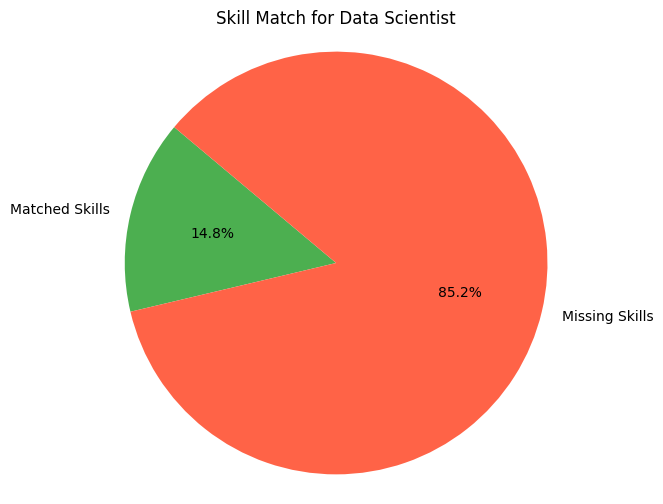

In [ ]:
if not selected_job_role_data.empty:
  # Clean and normalize required skills
  required_skills = [skill.lower().strip(",() ") for skill in required_skills]  # Remove unwanted chars and convert to lower case
  # Find matched and missing skills
  matched_skills = [skill for skill in resume_skills if skill in required_skills]
  missing_skills = [skill for skill in required_skills if skill not in resume_skills]
  print(f"Matched Skills: {matched_skills}")
  print(f"Missing Skills: {missing_skills}")
  # Step 13: Plot the pie chart
  import matplotlib.pyplot as plt

  matched_percentage = (len(matched_skills) / len(required_skills)) * 100
  missing_percentage = 100 - matched_percentage
  print(len(matched_skills))
  print(len(required_skills))

  labels = ['Matched Skills', 'Missing Skills']
  sizes = [matched_percentage, missing_percentage]
  colors = ['#4CAF50', '#FF6347']

  plt.figure(figsize=(6, 6))
  plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
  plt.axis('equal')
  plt.title(f"Skill Match for {selected_job_role}")
  plt.show()

In [ ]:
# Apply TF-IDF to the 'Technical Skills Needed' column to create feature vectors for all job roles
X = tfidf_vectorizer.fit_transform(job_role_df['Technical Skills Needed'])

# Step 5: Convert the user's resume skills into a string and vectorize it using the same TF-IDF vectorizer
resume_skills_str = ' '.join(resume_skills)
resume_vector = tfidf_vectorizer.transform([resume_skills_str])

print("Vectorized Resume Skills:", resume_vector)


Vectorized Resume Skills:   (0, 141)	0.17746126480705107
  (0, 189)	0.3666744070897313
  (0, 261)	0.10464066525361773
  (0, 343)	0.22178037475584894
  (0, 360)	0.06891181218178152
  (0, 361)	0.2583372117669557
  (0, 374)	0.12735847087323796
  (0, 520)	0.2313001978728753
  (0, 595)	0.23307663601921588
  (0, 645)	0.21761721145574003
  (0, 735)	0.25544366466540164
  (0, 736)	0.21761721145574003
  (0, 878)	0.3032554209265685
  (0, 913)	0.3032554209265685
  (0, 957)	0.32028875337268803
  (0, 974)	0.24764004971440368
  (0, 1098)	0.09622785772271926
  (0, 1451)	0.24764004971440368


In [ ]:
# Step 6: Calculate the cosine similarity between the resume vector and all job role vectors
similarity_scores = cosine_similarity(resume_vector, X)

# Flatten the similarity scores array
similarity_scores = similarity_scores.flatten()

# Step 7: Add similarity scores to the job role dataset for ranking
job_role_df['Similarity Score'] = similarity_scores


In [ ]:
# Step 8: Rank the job roles based on similarity scores
job_role_df_sorted = job_role_df.sort_values(by='Similarity Score', ascending=False)

# Step 9: Recommend the top N job roles
top_N = 3  # You can change this value to recommend more or fewer jobs
recommended_jobs = job_role_df_sorted[['Job Role', 'Similarity Score']].head(top_N)

# Print top N recommended job roles and their similarity scores
print(f"Top {top_N} Roles matched with your resume:")

for idx, row in enumerate(recommended_jobs.itertuples(), 1):
    print(f"{idx}. {row[1]} with a similarity score of {row[2]:.2f}")


Top 3 Roles matched with your resume:
1. Database Administrator with a similarity score of 0.29
2. Information Architect with a similarity score of 0.27
3. UX/UI Developer with a similarity score of 0.27


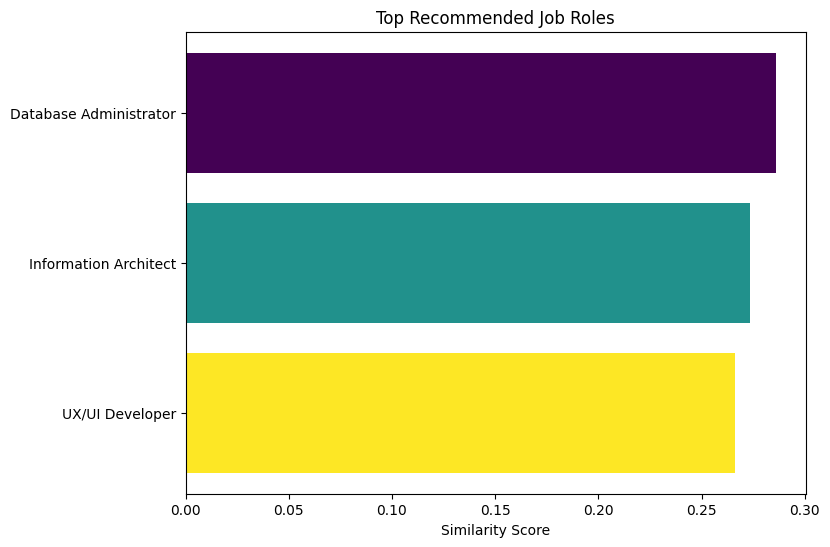

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Step 10: Visualize the top recommended job roles with their similarity scores, with different colors
colors = plt.cm.viridis(np.linspace(0, 1, top_N))  # Create a color gradient

plt.figure(figsize=(8, 6))
plt.barh(recommended_jobs['Job Role'], recommended_jobs['Similarity Score'], color=colors)
plt.xlabel('Similarity Score')
plt.title('Top Recommended Job Roles')
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest score on top
plt.show()
